# Classifier 4: Linear Support Vector Machine (SVM) for classification

* Mapping data in a higher dimensional feature space to categorize data
* Maximizes predictive accuracy without going overfitting

In [1]:
# Classifier: SVC with linear kernel(d)

# 6.d1.1 Modelling - Implementing Model

# Import required modules
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Classification using support vector classifier with linear kernel
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Reading the processed data from local directory
processed_train=pd.read_csv("/Users/alexmak/Desktop/CMPUT/Personal/summer2023/TitanicProject/Data/Processed_Data/scaled_train.csv")
processed_test=pd.read_csv("/Users/alexmak/Desktop/CMPUT/Personal/summer2023/TitanicProject/Data/Processed_Data/scaled_test.csv")
target=pd.read_csv("/Users/alexmak/Desktop/CMPUT/Personal/summer2023/TitanicProject/Data/Processed_Data/target.csv")

# split the training data, test with sizes 
X_train, X_test, y_train, y_test = train_test_split(processed_train, target, test_size=0.2)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

# Train the model with the default settings
svc_clf = SVC(kernel="linear")

# Fit the clasifier model
svc_clf.fit(X_train, y_train)

# make predictions from model
y_pred=svc_clf.predict(X_test)

(712, 11) (179, 11)
(712, 1) (179, 1)


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.7821229050279329


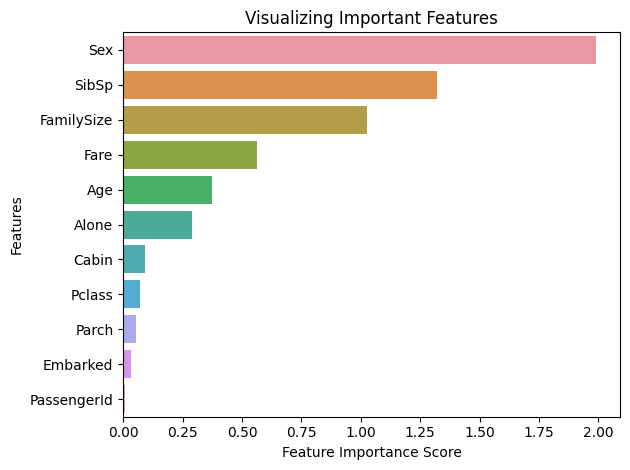

In [2]:
# 6.d1.2 Modelling - model analysis

from pandas import Series
from matplotlib import pyplot as plt

# feature_imp = pd.Series(svc_clf.coef_, index=scaled_train.columns).sort_values(ascending=False)

feature_imp=pd.Series(abs(svc_clf.coef_[0]), index=processed_train.columns).sort_values(ascending=False)
print("Accuracy: {}".format(metrics.accuracy_score(y_test, y_pred))) 
# 82.68%

# # Plot out the features' importance using a barplot
# plt.figure(figuresize=(20,5))
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.tight_layout()           

In [3]:
# 6.d1.3 Modelling - Hyperparamater Tuning and model optimization

from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

# Removing less important features (determined above)
new_train = processed_train.drop(['Alone','Parch','Embarked', 'SibSp'], axis=1)
new_test = processed_test.drop(['Alone','Parch','Embarked', 'SibSp'], axis=1)

# 80-20 split
X_train, X_test, y_train, y_test = train_test_split(new_train, target, test_size=0.2)

# fit the classifier for tuning hyperparameter
svc_clf = SVC(kernel="linear")

# Grid search CV (cross validation) to find the best hyperparameters for tuning
svc_param_grid = {
    'C': [0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50],
    'degree': [3, 4, 5, 6, 7, 8, 9],
    'tol': [1e-4, 1e-3, 1e-2, 0.1],
    'class_weight' : [None, 'balanced']
}

# Perform Hyperparameter Tuning
svc_grid_search = GridSearchCV(SVC(kernel="linear"), param_grid=svc_param_grid)
svc_grid_search.fit(X_train, y_train)
print(svc_grid_search.best_estimator_)

# Fit the tuned model
tuned_svc_clf=svc_grid_search.best_estimator_
tuned_svc_clf.fit(X_train, y_train)

# Tuned model make predictions on test
y_pred = tuned_svc_clf.predict(X_test)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/valid

SVC(C=5, kernel='linear', tol=0.0001)


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/valid

Tuned Accuracy: 0.8156424581005587
              precision    recall  f1-score   support

           0       0.85      0.88      0.87       121
           1       0.73      0.69      0.71        58

    accuracy                           0.82       179
   macro avg       0.79      0.78      0.79       179
weighted avg       0.81      0.82      0.81       179

Your submission was successfully saved!


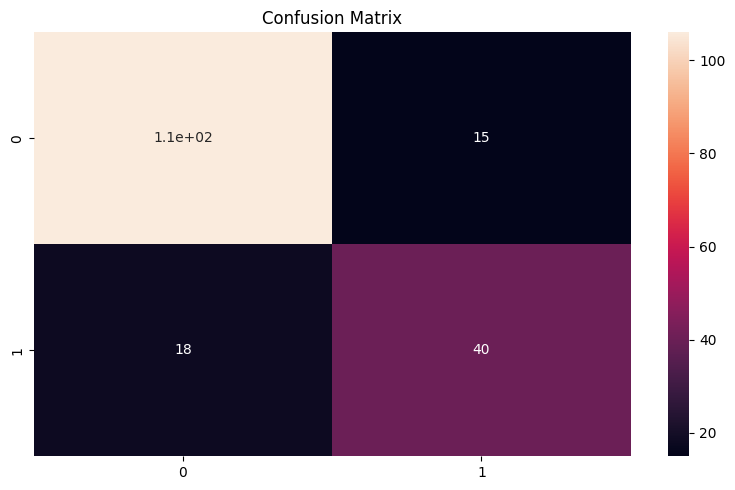

In [4]:
# 6.d1.4 Modelling - Result Presentation

# Accuracy Score, can go as high as 85%
print("Tuned Accuracy: {}".format(metrics.accuracy_score(y_test, y_pred))) # 75~77%

# Classification report
print(classification_report(y_test,y_pred))

# Confusion matrix (TP, FP, TN, NN)
conf_matrix=confusion_matrix(y_test, y_pred)

# Seaborn heatmap
plt.figure(figsize=(8,5))
sns.heatmap(conf_matrix, annot=True)
plt.title('Confusion Matrix')
plt.tight_layout()

# make predictions on testing data again
prediction = tuned_svc_clf.predict(new_test)
# Make a new column to store the predictions
new_test['Survival_Predictions'] = pd.Series(prediction)

# Submit Output in Kaggle 
output = pd.DataFrame({'PassengerId': new_test.PassengerId, 'Survived': prediction})

# Assign output to a csv file
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

# Summary of Linear SVM

## For SVC with linear kernel
* Regular accuracy and tuned accuracy lower than decision tree,  random forest, and KNN
* Value of C fluctuates when tuning
* Kaggle accuracy has little to no variance, always the same

* Kaggle accuracy: 0.76555, 0.76555, 0.77511, 0.76555, 0.76555

## For linear SVC
* Accuracy and tuned accuracy relatviely high 

* Kaggle accruacy has little to no variance
* Kaggle accuracy: 0.76076, 0.77751, 0.76794, 0.77511, 0.75837

## Advantages:  
* Effective in high dimensional spaces
* Effective even when # of dimensions > # of samples
* Memory Efficient, uses subset of training points in decision function (support vectors)
* Versatile, can use different kernel (linear, RBF, etc)

## Disadvantages:  
* If # of features > # of samples, crucial to choose the right kernel to prevent overfitting
* Not directly provide probability estimates, instead they are calculated by expensive 5-fold CV